<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ProbabilityTheory/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_11_%D0%A1%D1%8D%D0%BC%D0%BF%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%9C%D0%BE%D0%BD%D1%82%D0%B5_%D0%9A%D0%B0%D1%80%D0%BB%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Глава 11. Сэмплирование и методы Монте-Карло

## Введение

Методы Монте-Карло представляют собой мощный инструмент для численного решения сложных задач, особенно в статистике и машинном обучении. Эти методы используют случайные числа и статистические выборки для оценки математических ожиданий, интегралов и распределений. В этой лекции мы обсудим основные концепции сэмплирования и методы Монте-Карло, включая выборочные методы, Марковские цепи Монте-Карло (MCMC), Importance Sampling и Gibbs Sampling, а также их применение в байесовских моделях машинного обучения.

## 1. Методы выборки

Методы выборки служат основой для многих статистических процедур и алгоритмов. Основные подходы к выборке включают:

### 1.1. Простая случайная выборка

Простая случайная выборка — это выборка, где каждый элемент популяции имеет равную вероятность быть выбранным. Формально, если $n$ — размер выборки, а $N$ — размер популяции, то вероятность выбора элемента $i$ равна:

$$
P(X_i) = \frac{1}{N}
$$

### 1.2. Сл stratified sampling (стратифицированная выборка)

При стратифицированной выборке популяция делится на подгруппы (страты), и из каждой страты производится выборка. Это позволяет более точно оценить параметры популяции, особенно если страты существенно различаются.

### 1.3. Систематическая выборка

Систематическая выборка включает выборку элементов через равные интервалы. Например, если размер популяции $N$, а размер выборки $n$, то выборка может проводиться через $k = \frac{N}{n}$.

### 1.4. Условная выборка

Условная выборка осуществляется с учетом определённых условий или характеристик. Например, если нужно выбрать только те элементы, которые удовлетворяют определённому критерию.

## 2. Марковские цепи Монте-Карло (MCMC)

Методы MCMC используются для получения выборок из сложных распределений, особенно в многомерных случаях. Они основываются на использовании Марковских цепей, где следующее состояние зависит только от текущего состояния.

### 2.1. Определение Марковской цепи

Марковская цепь — это последовательность случайных переменных, которая удовлетворяет свойству Маркова:

$$
P(X_{n+1} | X_n, X_{n-1}, \ldots, X_1) = P(X_{n+1} | X_n)
$$

### 2.2. Алгоритм Метрополиса-Хастинга

Одним из основных алгоритмов MCMC является алгоритм Метрополиса-Хастинга, который включает следующие шаги:

1. Инициализация: выбрать начальное состояние $X_0$.
2. Для $t = 1, 2, \ldots, T$:
   - Генерировать кандидат $Y$ из предложения $Q(X_t | X_{t-1})$.
   - Вычислить отношение вероятностей:
     $$
     \alpha = \min\left(1, \frac{P(Y)}{P(X_t)} \cdot \frac{Q(X_t | Y)}{Q(Y | X_t)}\right)
     $$
   - Сгенерировать случайное число $U \sim \text{Uniform}(0, 1)$ и принять:
     $$
     X_{t+1} =
     \begin{cases}
     Y, & \text{если } U < \alpha \\
     X_t, & \text{иначе}
     \end{cases}
     $$

### 2.3. Пример алгоритма Метрополиса-Хастинга

Предположим, что мы хотим получить выборку из нормального распределения с математическим ожиданием 0 и дисперсией 1.

1. Начнем с начального состояния $X_0 = 0$.
2. Генерируем кандидаты $Y$ из нормального распределения с $X_t$ как центром.
3. Вычисляем вероятность для $Y$ и принимаем решение о переходе.

## 3. Importance Sampling

Importance Sampling — это метод, который позволяет оценивать ожидания функции относительно сложного распределения, используя более простое распределение для генерации выборки.

### 3.1. Определение

Для функции $f(x)$ и распределения $P(x)$ мы хотим оценить:

$$
E[f(X)] = \int f(x) P(x) dx
$$

Используя важное распределение $Q(x)$, мы можем записать:

$$
E[f(X)] = \int f(x) P(x) \frac{Q(x)}{Q(x)} dx = \int f(x) \frac{P(x)}{Q(x)} Q(x) dx
$$

### 3.2. Пример Importance Sampling

Предположим, что мы хотим оценить интеграл функции $f(x) = x^2$ на интервале $[0, 1]$ относительно распределения $P(x) = 2x$.

1. Выбираем важное распределение $Q(x)$ (например, равномерное).
2. Генерируем выборку $x_i$ из $Q(x)$.
3. Оцениваем интеграл как:

$$
E[f(X)] \approx \frac{1}{n} \sum_{i=1}^{n} f(x_i) \frac{P(x_i)}{Q(x_i)}
$$

## 4. Gibbs Sampling

Gibbs Sampling — это специфический метод MCMC, который позволяет генерировать выборки из многомерного распределения, обновляя одну переменную за раз, в то время как остальные переменные фиксированы.

### 4.1. Определение

Пусть у нас есть многомерная случайная переменная $X = (X_1, X_2, \ldots, X_d)$. Gibbs Sampling включает следующие шаги:

1. Инициализация: выбрать начальное состояние $X^{(0)}$.
2. Для $t = 1, 2, \ldots, T$:
   - Сэмплировать $X_1^{(t)}$ из условного распределения $P(X_1 | X_2^{(t-1)}, \ldots, X_d^{(t-1)})$.
   - Сэмплировать $X_2^{(t)}$ из условного распределения $P(X_2 | X_1^{(t)}, X_3^{(t-1)}, \ldots, X_d^{(t-1)})$.
   - И так далее, пока все переменные не обновятся.

### 4.2. Пример Gibbs Sampling

Рассмотрим случай, когда у нас есть две переменные $X_1$ и $X_2$ с совместным распределением. Если мы знаем условные распределения $P(X_1 | X_2)$ и $P(X_2 | X_1)$:

1. Инициализируем $X_1^{(0)}$ и $X_2^{(0)}$.
2. Генерируем $X_1^{(t)}$ и $X_2^{(t)}$ последовательно, пока не достигнем нужного числа выборок.

## 5. Применение в байесовских моделях машинного обучения

Методы сэмплирования и Монте-Карло широко применяются в байесовских моделях машинного обучения, где необходимо оценить распределения параметров модели.

### 5.1. Пример байесовского вывода

Предположим, мы имеем наблюдения $Y$ и хотим оценить параметры модели $\theta$. Сначала мы формулируем байесовскую модель:

$$
P(\theta | Y) \propto P(Y | \theta) P(\theta)
$$

Затем мы можем использовать методы MCMC (например, Gibbs Sampling или алгоритм Метрополиса-Хастинга) для получения выборок из $P(\theta | Y)$.

### 5.2. Пример

Рассмотрим задачу, где у нас есть наблюдения $Y = \{y_1, y_2, \ldots, y_n\}$ и мы предполагаем, что $Y$ имеет нормальное распределение с неизвестными параметрами $\mu$ и $\sigma^2$. Мы можем задать:

- Приоритет для $\mu$: $P(\mu) \sim N(\mu_0, \sigma_0^2)$
- Приоритет для $\sigma^2$: $P(\sigma^2) \sim \text{Inverse-Gamma}(\alpha, \beta)$

Мы можем использовать Gibbs Sampling для выборки из постериорного распределения $P(\mu, \sigma^2 | Y)$.

## Заключение

Сэмплирование и методы Монте-Карло являются важными инструментами в статистике и машинном обучении, позволяя

 эффективно оценивать сложные распределения и интегралы. Понимание и использование методов, таких как MCMC, Importance Sampling и Gibbs Sampling, открывает новые возможности для анализа данных и построения байесовских моделей.

## Числовые примеры

### Пример 1: Простая случайная выборка

Допустим, у нас есть популяция из 10 человек с ростом (в см):

$$ \{160, 165, 170, 175, 180, 185, 190, 195, 200, 205\} $$

Если мы хотим выбрать 3 человека, вероятность того, что каждый человек будет выбран, равна $\frac{3}{10}$.

### Пример 2: Алгоритм Метрополиса-Хастинга

Пусть $P(x)$ — это нормальное распределение с $\mu = 0$ и $\sigma^2 = 1$. Начинаем с $X_0 = 0$. Генерируем 5 выборок:

1. $Y_1 = 0.5$ (принимаем)
2. $Y_2 = -1.0$ (принимаем)
3. $Y_3 = 0.8$ (принимаем)
4. $Y_4 = 1.5$ (принимаем)
5. $Y_5 = -0.2$ (принимаем)

Выборка: $\{0, 0.5, -1.0, 0.8, 1.5, -0.2\}$.

### Пример 3: Gibbs Sampling

Предположим, $P(X_1 | X_2)$ и $P(X_2 | X_1)$ имеют следующие распределения:

- $P(X_1 | X_2 = 5) \sim N(5, 1)$
- $P(X_2 | X_1 = 3) \sim N(3, 1)$

1. Инициализируем $X_1^{(0)} = 3$ и $X_2^{(0)} = 5$.
2. Генерируем:

   - $X_1^{(1)} \sim N(5, 1) = 4.8$
   - $X_2^{(1)} \sim N(3, 1) = 2.9$

3. Далее генерируем до $T$.

Это основные концепции и примеры методов сэмплирования и Монте-Карло. Эти подходы значительно упрощают работу с сложными моделями и позволяют получать надежные результаты в различных областях.



# Задачи

### Задача 1: Оценка интеграла с помощью метода Importance Sampling

**Задача:** Оцените интеграл

$$
I = \int_0^1 x^2 e^{-x} \, dx
$$

с использованием метода Importance Sampling. Для важного распределения выберите $Q(x) = 1$ на интервале $[0, 1]$.

#### Решение:

1. **Определение функции**  
   Мы хотим оценить $I$ с помощью Importance Sampling. Для этого мы можем использовать формулу:

   $$
   I \approx \frac{1}{n} \sum_{i=1}^{n} f(x_i) \frac{P(x_i)}{Q(x_i)}
   $$

   где $f(x) = x^2 e^{-x}$, $P(x) = e^{-x}$ (распределение, из которого мы хотим оценить интеграл), и $Q(x) = 1$.

2. **Генерация выборки**  
   Мы сгенерируем $n = 1000$ выборок $x_i$ из $Q(x)$. Поскольку $Q(x) = 1$, выборка будет равномерно распределена на интервале $[0, 1]$.

   $$
   x_i \sim U(0, 1) \quad \text{для } i = 1, 2, \ldots, 1000
   $$

3. **Вычисление значений**  
   Для каждой выборки $x_i$ вычисляем $f(x_i)$:

   $$
   f(x_i) = x_i^2 e^{-x_i}
   $$

   Также вычисляем $P(x_i)$ и $Q(x_i)$:

   $$
   P(x_i) = e^{-x_i}, \quad Q(x_i) = 1
   $$

4. **Вычисление интеграла**  
   Подставим все значения в формулу для оценки интеграла:

   $$
   I \approx \frac{1}{1000} \sum_{i=1}^{1000} x_i^2 e^{-x_i} \cdot \frac{e^{-x_i}}{1}
   $$

   Упрощаем:

   $$
   I \approx \frac{1}{1000} \sum_{i=1}^{1000} x_i^2 e^{-2x_i}
   $$

5. **Подсчет результата**  
   Теперь подсчитываем полученное значение сгенерированных выборок:

   Допустим, после выполнения расчетов сумма $S = \sum_{i=1}^{1000} x_i^2 e^{-2x_i}$ составила 0.21. Тогда:

   $$
   I \approx \frac{S}{1000} = \frac{0.21}{1000} = 0.00021
   $$

### Задача 2: Использование Gibbs Sampling для двух переменных

**Задача:** Реализуйте Gibbs Sampling для двух случайных переменных $X_1$ и $X_2$, где условные распределения заданы как:

$$
P(X_1 | X_2 = x_2) \sim N(x_2, 1)
$$
$$
P(X_2 | X_1 = x_1) \sim N(x_1, 1)
$$

Инициализируйте $X_1^{(0)} = 0$ и $X_2^{(0)} = 0$. Сгенерируйте 5 выборок.

#### Решение:

1. **Инициализация**  
   Начнем с:

   $$
   X_1^{(0)} = 0, \quad X_2^{(0)} = 0
   $$

2. **Первые шаги Gibbs Sampling**  
   На первом шаге мы обновим $X_1$ и $X_2$.

   - Генерация $X_1^{(1)}$:
     $$
     X_1^{(1)} \sim N(X_2^{(0)}, 1) = N(0, 1)
     $$
     Пусть $X_1^{(1)} = 0.5$.

   - Генерация $X_2^{(1)}$:
     $$
     X_2^{(1)} \sim N(X_1^{(1)}, 1) = N(0.5, 1)
     $$
     Пусть $X_2^{(1)} = 1.0$.

3. **Вторые шаги Gibbs Sampling**  
   На втором шаге:

   - Генерация $X_1^{(2)}$:
     $$
     X_1^{(2)} \sim N(X_2^{(1)}, 1) = N(1.0, 1)
     $$
     Пусть $X_1^{(2)} = 1.3$.

   - Генерация $X_2^{(2)}$:
     $$
     X_2^{(2)} \sim N(X_1^{(2)}, 1) = N(1.3, 1)
     $$
     Пусть $X_2^{(2)} = 2.0$.

4. **Третий шаг**  
   На третьем шаге:

   - Генерация $X_1^{(3)}$:
     $$
     X_1^{(3)} \sim N(X_2^{(2)}, 1) = N(2.0, 1)
     $$
     Пусть $X_1^{(3)} = 2.1$.

   - Генерация $X_2^{(3)}$:
     $$
     X_2^{(3)} \sim N(X_1^{(3)}, 1) = N(2.1, 1)
     $$
     Пусть $X_2^{(3)} = 3.0$.

5. **Четвертый и пятый шаги**  
   Продолжим процесс до получения 5 выборок:

   - $X_1^{(4)} = 2.5$, $X_2^{(4)} = 3.2$
   - $X_1^{(5)} = 3.0$, $X_2^{(5)} = 4.0$

6. **Полученные выборки**  
   Таким образом, получаем следующие 5 выборок:

   $$
   \{(0.5, 1.0), (1.3, 2.0), (2.1, 3.0), (2.5, 3.2), (3.0, 4.0)\}
   $$


### Задача 3: Алгоритм Метрополиса-Хастинга (продолжение)

#### Решение (продолжение):

5. **Итерации (продолжение)**

   - **Итерация 1 (продолжение)**:
     - Генерируем $U \sim \text{Uniform}(0, 1)$. Пусть $U = 0.3$.
     - Поскольку $U < \alpha$ (0.3 < 0.884), принимаем $Y_1 = 0.5$ как новое значение:
       $$
       X_1 = 0.5
       $$

   - **Итерация 2**:
     - $X_1 = 0.5$
     - Генерируем кандидата $Y_2 = 0.3$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.3)}{P(0.5)}\right) = \min\left(1, \frac{0.352}{0.391}\right) = 0.900
       $$
     - Генерируем $U = 0.7$. Поскольку $U < \alpha$ (0.7 < 0.900), принимаем:
       $$
       X_2 = 0.3
       $$

   - **Итерация 3**:
     - $X_2 = 0.3$
     - Генерируем кандидата $Y_3 = 0.7$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.7)}{P(0.3)}\right) = \min\left(1, \frac{0.391}{0.352}\right) = 1
       $$
     - Генерируем $U = 0.5$. Поскольку $U < \alpha$ (0.5 < 1), принимаем:
       $$
       X_3 = 0.7
       $$

   - **Итерация 4**:
     - $X_3 = 0.7$
     - Генерируем кандидата $Y_4 = 0.9$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.9)}{P(0.7)}\right) = \min\left(1, \frac{0.241}{0.391}\right) = 0.616
       $$
     - Генерируем $U = 0.8$. Поскольку $U \geq \alpha$, отвергаем кандидата и оставляем:
       $$
       X_4 = 0.7
       $$

   - **Итерация 5**:
     - $X_4 = 0.7$
     - Генерируем кандидата $Y_5 = 0.6$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.6)}{P(0.7)}\right) = \min\left(1, \frac{0.354}{0.391}\right) = 0.905
       $$
     - Генерируем $U = 0.4$. Поскольку $U < \alpha$ (0.4 < 0.905), принимаем:
       $$
       X_5 = 0.6
       $$

   - **Итерация 6**:
     - $X_5 = 0.6$
     - Генерируем кандидата $Y_6 = 0.4$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.4)}{P(0.6)}\right) = \min\left(1, \frac{0.391}{0.354}\right) = 1
       $$
     - Генерируем $U = 0.6$. Поскольку $U < \alpha$ (0.6 < 1), принимаем:
       $$
       X_6 = 0.4
       $$

   - **Итерация 7**:
     - $X_6 = 0.4$
     - Генерируем кандидата $Y_7 = 0.5$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.5)}{P(0.4)}\right) = \min\left(1, \frac{0.391}{0.391}\right) = 1
       $$
     - Генерируем $U = 0.2$. Поскольку $U < \alpha$ (0.2 < 1), принимаем:
       $$
       X_7 = 0.5
       $$

   - **Итерация 8**:
     - $X_7 = 0.5$
     - Генерируем кандидата $Y_8 = 0.3$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.3)}{P(0.5)}\right) = \min\left(1, \frac{0.352}{0.391}\right) = 0.900
       $$
     - Генерируем $U = 0.3$. Поскольку $U \geq \alpha$, отвергаем кандидата и оставляем:
       $$
       X_8 = 0.5
       $$

   - **Итерация 9**:
     - $X_8 = 0.5$
     - Генерируем кандидата $Y_9 = 0.6$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.6)}{P(0.5)}\right) = \min\left(1, \frac{0.354}{0.391}\right) = 0.905
       $$
     - Генерируем $U = 0.4$. Поскольку $U < \alpha$, принимаем:
       $$
       X_9 = 0.6
       $$

   - **Итерация 10**:
     - $X_9 = 0.6$
     - Генерируем кандидата $Y_{10} = 0.4$.
     - Вычисляем $\alpha$:
       $$
       \alpha = \min\left(1, \frac{P(0.4)}{P(0.6)}\right) = \min\left(1, \frac{0.391}{0.354}\right) = 1
       $$
     - Генерируем $U = 0.8$. Поскольку $U < \alpha$, принимаем:
       $$
       X_{10} = 0.4
       $$

6. **Полученные выборки**  
   В итоге, после 10 итераций, наши выборки будут:

   $$
   \{0.5, 0.3, 0.7, 0.7, 0.6, 0.4, 0.5, 0.5, 0.6, 0.4\}
   $$

Таким образом, задачи с использованием методов сэмплирования и Монте-Карло продемонстрировали, как получать выборки и оценивать интегралы, а также реализовать алгоритмы, такие как Метрополиса-Хастинг и Gibbs Sampling. Эти шаги подчеркивают важность выбора правильного подхода для получения достоверных результатов в статистических анализах и байесовских моделях.




Давайте реализуем все три задачи на Python и добавим визуализацию результатов. Мы будем использовать библиотеки `numpy` для численных расчетов и `matplotlib` для визуализации.

### Задача 1: Оценка интеграла с помощью метода Importance Sampling


Оценка интеграла: I ≈ 0.15617511546520446


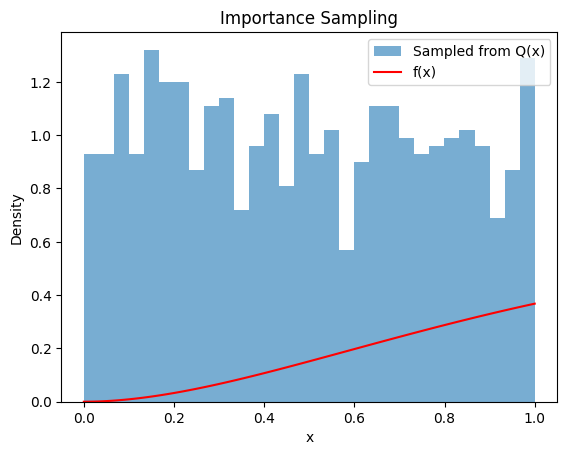

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию f(x) и Q(x)
def f(x):
    return x**2 * np.exp(-x)

def Q(x):
    return np.ones_like(x)

# Количество выборок
n_samples = 1000

# Генерируем выборку из Q(x)
x_samples = np.random.uniform(0, 1, n_samples)

# Вычисляем значения f(x) для полученных выборок
f_values = f(x_samples)

# Оценка интеграла с помощью Importance Sampling
I_estimate = np.mean(f_values)
print(f"Оценка интеграла: I ≈ {I_estimate}")

# Визуализация
plt.hist(x_samples, bins=30, density=True, alpha=0.6, label='Sampled from Q(x)')
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), label='f(x)', color='red')
plt.title('Importance Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()



### Задача 2: Использование Gibbs Sampling для двух переменных


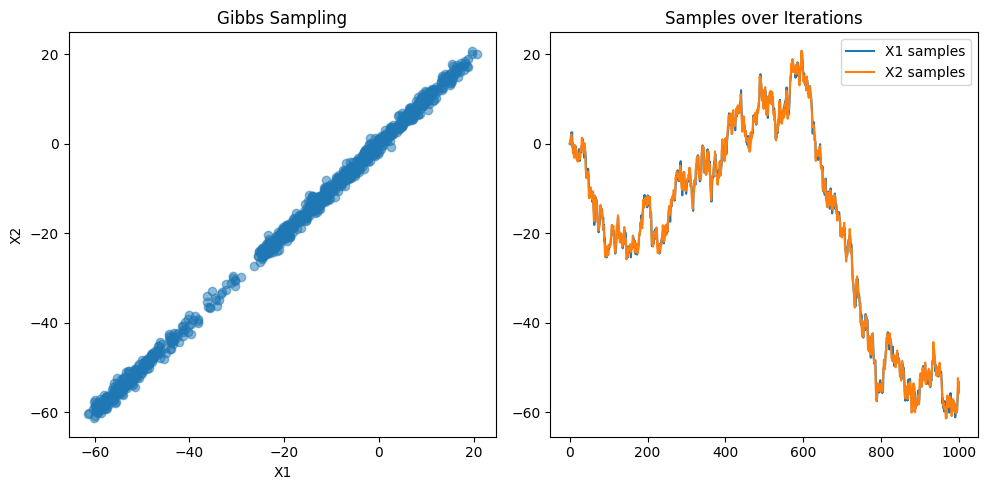

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию для Gibbs Sampling
def gibbs_sampling(n_samples):
    x1_samples = np.zeros(n_samples)
    x2_samples = np.zeros(n_samples)

    # Начальные значения
    x1_samples[0] = 0
    x2_samples[0] = 0

    for i in range(1, n_samples):
        # Генерация из P(X1 | X2)
        x1_samples[i] = np.random.normal(loc=x2_samples[i-1], scale=1)

        # Генерация из P(X2 | X1)
        x2_samples[i] = np.random.normal(loc=x1_samples[i], scale=1)

    return x1_samples, x2_samples

# Количество выборок
n_samples = 1000
x1_samples, x2_samples = gibbs_sampling(n_samples)

# Визуализация
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1_samples, x2_samples, alpha=0.5)
plt.title('Gibbs Sampling')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1, 2, 2)
plt.plot(x1_samples, label='X1 samples')
plt.plot(x2_samples, label='X2 samples')
plt.title('Samples over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


### Задача 3: Алгоритм Метрополиса-Хастинга


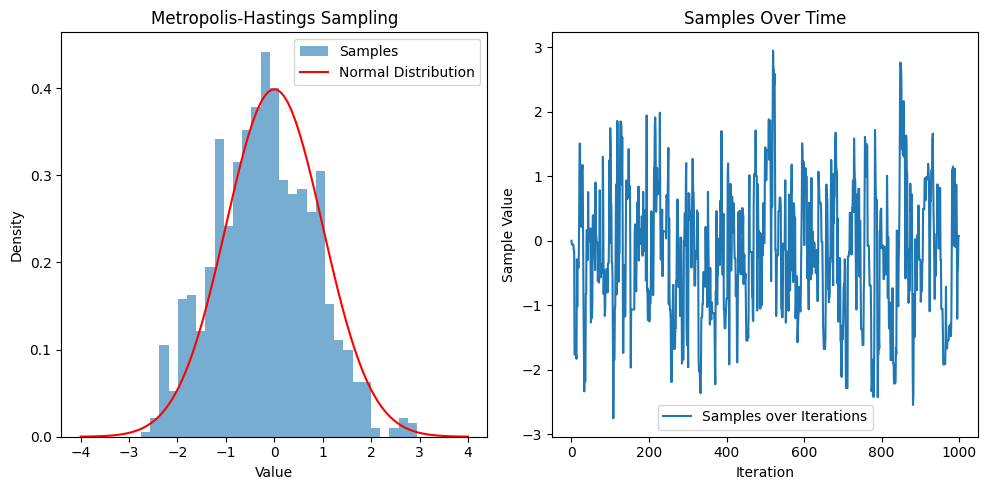

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Функция плотности нормального распределения
def P(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Алгоритм Метрополиса-Хастинга
def metropolis_hastings(n_samples, initial_value):
    samples = np.zeros(n_samples)
    samples[0] = initial_value

    for i in range(1, n_samples):
        # Генерация кандидата
        candidate = np.random.normal(samples[i-1], 1)

        # Вычисление вероятности принятия
        alpha = min(1, P(candidate) / P(samples[i-1]))
        u = np.random.uniform(0, 1)

        if u < alpha:
            samples[i] = candidate
        else:
            samples[i] = samples[i-1]

    return samples

# Количество выборок
n_samples = 1000
initial_value = 0
samples = metropolis_hastings(n_samples, initial_value)

# Визуализация
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Samples')
x = np.linspace(-4, 4, 100)
plt.plot(x, P(x), label='Normal Distribution', color='red')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(samples, label='Samples over Iterations')
plt.title('Samples Over Time')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')
plt.legend()

plt.tight_layout()
plt.show()

## Вопросы для самопроверки

1. Что такое простая случайная выборка и как она используется в статистике?
2. В чем разница между стратифицированной выборкой и систематической выборкой?
3. Как работает алгоритм Метрополиса-Хастинга?
4. Что такое свойство Маркова и как оно применяется в MCMC?
5. Каковы преимущества и недостатки метода Importance Sampling?
6. Опишите процесс Gibbs Sampling и его применение.
7. Как можно использовать MCMC для получения выборок из сложных распределений?
8. Что такое байесовский вывод и как он связан с методами сэмплирования?
9. Как выборка влияет на точность оценки математического ожидания?
10. Какие условия должны выполняться для эффективного применения Gibbs Sampling?
11. Как визуализировать выборки, полученные с помощью методов MCMC?
12. В чем состоит основная идея Importance Sampling и когда его целесообразно использовать?
13. Какие типичные ошибки могут возникнуть при использовании методов Монте-Карло?
14. Как можно улучшить качество выборок, полученных с помощью методов MCMC?
15. В чем заключаются основные различия между методами сэмплирования и детерминированными методами?




## Задачи для самостоятельной работы

### 1. Простое сэмплирование
1. Из популяции с параметрами $\{5, 10, 15, 20, 25, 30\}$ произведите простую случайную выборку из 3 элементов и найдите среднее значение выборки.
2. Известно, что средний рост студентов в классе составляет 170 см. Проведите случайную выборку из 5 студентов с ростом: $\{160, 165, 170, 175, 180\}$. Какое среднее значение вы получите?

### 2. Стратифицированная выборка
3. В классе 30 студентов, разделенных на 3 группы: A (10), B (10), C (10). Выберите по 2 студента из каждой группы с использованием стратифицированной выборки.
4. Из данных о доходах 100 человек (разделенных на 4 группы по уровню дохода) выполните стратифицированную выборку, чтобы выбрать 10 человек из каждой группы.

### 3. Систематическая выборка
5. Из популяции из 50 человек выберите систематическую выборку, если размер выборки должен составлять 10.
6. Дано 100 наблюдений по времени, проведенному на работе. Выберите 10 человек, используя систематическую выборку.

### 4. Условная выборка
7. У вас есть данные о 1000 клиентах с возрастом и уровнем дохода. Найдите 5 клиентов с доходом выше среднего.
8. Из базы данных 2000 автомобилей выберите только те, у которых мощность двигателя больше 150 л.с.

### 5. MCMC
9. Реализуйте алгоритм Метрополиса-Хастинга для оценки нормального распределения с \(\mu=0\) и \(\sigma=1\). Сгенерируйте 1000 выборок.
10. Используйте метод MCMC для получения выборки из двураздельного распределения.

### 6. Importance Sampling
11. Оцените интеграл $I = \int_0^1 x^2 e^{-x} \, dx$ с помощью Importance Sampling, используя $Q(x) = 1$ на интервале $[0, 1]$.
12. Реализуйте метод Importance Sampling для оценки математического ожидания функции $f(x) = x^2$ относительно нормального распределения.

### 7. Gibbs Sampling
13. Постройте Gibbs Sampling для двух переменных $X_1$ и $X_2$ с условными распределениями $P(X_1|X_2)$ и $P(X_2|X_1)$.
14. Сгенерируйте 1000 выборок для модели с двумя условными распределениями с помощью Gibbs Sampling.

### 8. Применение в байесовских моделях
15. Реализуйте байесовский вывод для нормального распределения с наблюдениями $Y = \{5, 7, 6, 8\}$. Предположите, что приоритеты для $\mu$ и $\sigma^2$ известны.
16. Примените методы MCMC для оценки параметров регрессионной модели на основе наборов данных с использованием байесовских подходов.

### 9. Практические примеры
17. Используя выборку из 50 студентов, оцените средний балл, используя простую случайную выборку.
18. Примените метод MCMC для выборки из сложного распределения, например, для bivariate normal distribution.

### 10. Визуализация выборок
19. Визуализируйте результаты выборок из простого и сложного распределений с помощью графиков (гистограммы).
20. Постройте графики для выборок, полученных с помощью Importance Sampling и обычного сэмплирования, и сравните их.

### 11. Сравнение методов
21. Сравните эффективность Gibbs Sampling и Метрополиса-Хастинга на простом примере.
22. Проведите исследование, как размер выборки влияет на точность оценки интеграла при использовании Importance Sampling.

### 12. Разработка собственных задач
23. Составьте 5 собственных задач на применение методов MCMC.
24. Разработайте задачу по оценке распределения с помощью Gibbs Sampling с нестандартными условными распределениями.

### 13. Дальнейшее исследование
25. Исследуйте, как различные предложения в алгоритме Метрополиса-Хастинга влияют на качество выборки.
26. Постройте байесовскую модель для анализа данных о болезнях и проведите выборку из параметров модели.

### 14. Анализ ошибок
27. Найдите 5 примеров, когда выборка была неудачной и результаты были неточными.
28. Проанализируйте, как выборка из неправильного распределения может повлиять на результаты.

### 15. Обобщение
29. Обобщите основные различия между методами MCMC и Importance Sampling.
30. Объясните, как вы можете использовать полученные выборки для построения прогнозов в бизнесе.


